In [67]:
import pandas as pd
from matplotlib.cm import binary
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
# from sklearn.ensemble  import RandomForestClassifier,RandomForestRegressor
# from sklearn.svm import SVC
# from sklearn import svm
# from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression,LinearRegression
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score,precision_recall_curve
# from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedShuffleSplit,cross_val_predict
from sklearn.metrics import accuracy_score,mean_squared_error
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier
# from pandas.plotting import scatter_matrix
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

In [2]:
mnist = fetch_openml("mnist_784")

In [39]:
data_train = np.array(mnist['data'])[:600]
labels_train = np.array(mnist['target'])[:600].astype(np.int8)
data_test = np.array(mnist['data'])[600:700]
labels_test = np.array(mnist['target'])[600:700].astype(np.int8)

In [40]:
labels_train = (labels_train==5)
labels_test = (labels_test==5)

In [42]:
model = LogisticRegression(max_iter=1000)
pred_kfold = cross_val_predict(model,data_train,labels_train,cv=4)
print(pred_kfold)

[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False  True
  True False  True False False False False False False False False False
 False False False False False False  True False False False False False
 False False  True False False False False False False  True False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [52]:
prediction_score = cross_val_predict(model,data_train,labels_train,cv=4,method="decision_function")
prediction_score

array([  2.30634187, -23.44268658, -22.98874017, -25.26127588,
       -39.40467335, -34.93202726, -18.73308998, -23.2674793 ,
       -14.6430737 , -25.7124852 , -13.38900125,  -4.23889063,
        -6.7050796 , -16.03808296,  -9.40552011, -31.85523722,
       -46.31059265, -26.28117095,  -2.82497809, -17.0362815 ,
       -52.83893025, -20.5731518 , -23.49666246, -27.74038074,
       -18.33942499, -29.11241811, -11.68481178, -29.65416953,
       -65.36965964, -40.40663529, -15.79024858, -48.80399519,
        -8.69194664, -34.08288626,  -9.16363843,  11.67767465,
       -34.63251502, -22.4368695 , -47.14736619, -19.56236574,
       -20.22507352, -22.05576545, -12.8596526 , -15.48957039,
       -13.01272032, -23.84042517, -15.58120801,  16.7761742 ,
        10.8650925 ,  -7.89757543,   4.34316941, -33.76960227,
       -26.61294882,  -9.93566906, -18.51302811, -36.20969776,
       -37.34780175, -25.01554143, -27.81278215, -15.58654164,
       -50.02005983, -19.95715707,  -7.50819219, -66.66

In [55]:
model.fit(data_train,labels_train)
predictions = model.predict(data_test)
confusion_matrix(predictions,labels_test)

array([[88,  4],
       [ 1,  7]], dtype=int64)

In [56]:
classification_report(predictions,labels_test)

'              precision    recall  f1-score   support\n\n       False       0.99      0.96      0.97        92\n        True       0.64      0.88      0.74         8\n\n    accuracy                           0.95       100\n   macro avg       0.81      0.92      0.85       100\nweighted avg       0.96      0.95      0.95       100\n'

In [57]:
precision_score(predictions,labels_test)

0.6363636363636364

In [58]:
recall_score(predictions,labels_test)

0.875

In [59]:
f1_score(predictions,labels_test)

0.7368421052631579

In [63]:
precision,recall,thresholds = precision_recall_curve(labels_train,prediction_score)
print(precision,'\n',recall,"\n",thresholds)

[0.085      0.0851419  0.08528428 0.08542714 0.08557047 0.08571429
 0.08585859 0.08600337 0.08614865 0.08629442 0.08644068 0.08658744
 0.08673469 0.08688245 0.08703072 0.08717949 0.08732877 0.08747856
 0.08762887 0.08777969 0.08793103 0.0880829  0.08823529 0.08838821
 0.08854167 0.08869565 0.08885017 0.08900524 0.08916084 0.08931699
 0.08947368 0.08963093 0.08978873 0.08994709 0.09010601 0.09026549
 0.09042553 0.09058615 0.09074733 0.09090909 0.09107143 0.09123435
 0.09139785 0.09156194 0.09172662 0.09189189 0.09205776 0.09222423
 0.0923913  0.09255898 0.09272727 0.09289617 0.09306569 0.09323583
 0.09340659 0.09357798 0.09375    0.09392265 0.09409594 0.09426987
 0.09444444 0.09461967 0.09479554 0.09497207 0.09514925 0.0953271
 0.09550562 0.0956848  0.09586466 0.0960452  0.09622642 0.09640832
 0.09659091 0.09677419 0.09695817 0.09714286 0.09732824 0.09751434
 0.09770115 0.09788868 0.09807692 0.0982659  0.0984556  0.09864603
 0.09883721 0.09902913 0.09922179 0.0994152  0.09960938 0.09980

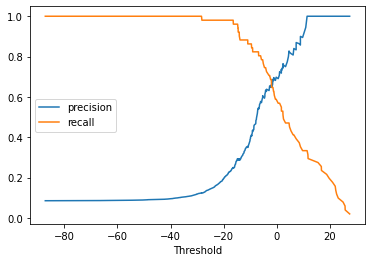

In [65]:
plt.plot(thresholds,precision[:-1],label="precision")
plt.plot(thresholds,recall[:-1],label="recall")
plt.legend()
plt.xlabel("Threshold")
plt.show()

In [68]:
sgd = SGDClassifier()
sgd_pred = cross_val_predict(sgd,data_train,labels_train,cv=4)
sgd_pred

array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [69]:
sgd_pred_score = cross_val_predict(sgd,data_train,labels_train,cv=5,method="decision_function")
pre,rec,thres = precision_recall_curve(labels_train,sgd_pred_score)

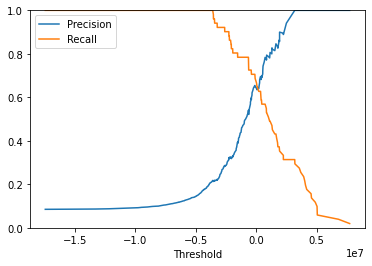

In [71]:
plt.plot(thres,pre[:-1],label="Precision")
plt.plot(thres,rec[:-1],label="Recall")
plt.legend()
plt.xlabel("Threshold")
plt.ylim([0,1])
plt.show()

In [72]:
sgd.fit(data_train,labels_train)
predict_sgd = sgd.predict(data_test)

In [73]:
print(accuracy_score(labels_test,predict_sgd))
print(precision_score(labels_test,predict_sgd))
print(recall_score(labels_test,predict_sgd))
print(f1_score(labels_test,predict_sgd))

0.92
0.6666666666666666
0.5454545454545454
0.6


In [74]:
confusion_matrix(labels_test,predict_sgd)

array([[86,  3],
       [ 5,  6]], dtype=int64)